## Stents - Tracing the cellular origin of in-stent restenosis

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os, sys, string

sc.set_figure_params(vector_friendly=False, fontsize=18)

import pandas as pd
import numpy as np
import seaborn as sns
import anndata
from scipy.io import mmwrite

import matplotlib.pyplot as plt
from collections import Counter

from typing import Tuple, Union, List, Dict, Callable
import os
import gzip
import shutil
import inspect
import h5py

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
def makedirs(dirpath):
    if not os.path.exists(dirpath):
        os.system("mkdir "+ dirpath)

In [4]:
home      = "/Users/shayat/Documents/Aachen/projects/stents/"
datahome  = home+ "data/"
resulthome= home+ "results/"

In [5]:
makedirs(home)
makedirs(datahome)
makedirs(resulthome)

In [6]:
cluster_file= 'scvi_output_clustered_subs.h5ad'

## functions

In [8]:
def plot_umap(adata, color_type, mytitle):
    # plot umap
    fig = plt.figure(figsize=(5, 5))
    plt.plot(adata.obsm['X_scvi_umap'][:, 0], 
         adata.obsm['X_scvi_umap'][:, 1], '.', ms=1, alpha=0.1, color=color_type)
    plt.xlabel('UMAP 0')
    plt.ylabel('UMAP 1')
    plt.title(mytitle)
    plt.gca().grid(False)
    plt.xticks([])
    plt.yticks([])

    # plt.tight_layout()
    # fig.savefig(fig_prefix + '_umap.pdf', bbox_inches='tight')
    
    return

## Start

In [9]:
adata = sc.read_h5ad(resulthome+ cluster_file)

In [11]:
adata

AnnData object with n_obs × n_vars = 5117 × 16129
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.1', 'seurat_clusters', 'cc', 'integrated_snn_res.0.2', 'cell_type', 'cluster', 'ident', 'scvi_batch', 'scrublet', 'n_counts', 'n_genes', 'scvi_library_size', 'solo_singlet_logit_prob', 'solo_doublet_logit_prob', 'leiden0.3', 'barcode', 'subcluster', 'main_class', 'subcluster_name'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'X_name', 'cell_type_colors', 'hvg', 'ident_colors', 'leiden', 'leiden0.3_colors', 'neighbors', 'orig.ident_colors', 'rank_genes_groups0.3', 'scvi_elbo_train', 'scvi_elbo_validation', 'scvi_kl_global_train', 'scvi_kl_global_validation', 'scvi_kl_local_train', 'scvi_kl_local_validation', 'scvi_reconstruction_loss_train', 'scvi_reconstruction_loss_validation', 'scvi_train_loss_epoch', 'scvi_train_loss_step', 'scvi_validation_loss', 'subcluster_name_colors'

In [12]:
adata.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.1,seurat_clusters,cc,integrated_snn_res.0.2,cell_type,cluster,...,n_counts,n_genes,scvi_library_size,solo_singlet_logit_prob,solo_doublet_logit_prob,leiden0.3,barcode,subcluster,main_class,subcluster_name
AAACCCAAGAACTTCC-1,pbmc3k,3898.0,1296,5.977424,0,0,case,0,B-cell,B-cell,...,3898.0,1296,1.842570,2.298886,-2.189409,0 : Bcells_1,AAACCCAAGAACTTCC-1,1.0,bcell,bcell_1.0
AAACCCACACCTGCGA-1,pbmc3k,5203.0,1858,8.072266,6,7,case,7,Endothelial1,Endothelial1,...,5203.0,1858,3.739815,4.349167,-4.120618,7 : EC1,AAACCCACACCTGCGA-1,0.0,ec,ec_0.0
AAACCCACACGGTGAA-1,pbmc3k,5038.0,1497,6.907503,1,1,case,1,T-cell,T-cell,...,5038.0,1497,1.484561,5.867903,-6.095890,1 : Tcell,AAACCCACACGGTGAA-1,0.0,tcell,tcell_0.0
AAACCCAGTCCTGGTG-1,pbmc3k,2937.0,1049,3.915560,1,1,case,1,T-cell,T-cell,...,2937.0,1049,0.844186,8.767744,-8.789881,1 : Tcell,AAACCCAGTCCTGGTG-1,0.0,tcell,tcell_0.0
AAACCCATCGGAGATG-1,pbmc3k,4020.0,1504,5.895522,1,1,case,1,T-cell,T-cell,...,4020.0,1504,0.857133,5.649117,-5.863461,1 : Tcell,AAACCCATCGGAGATG-1,0.0,tcell,tcell_0.0


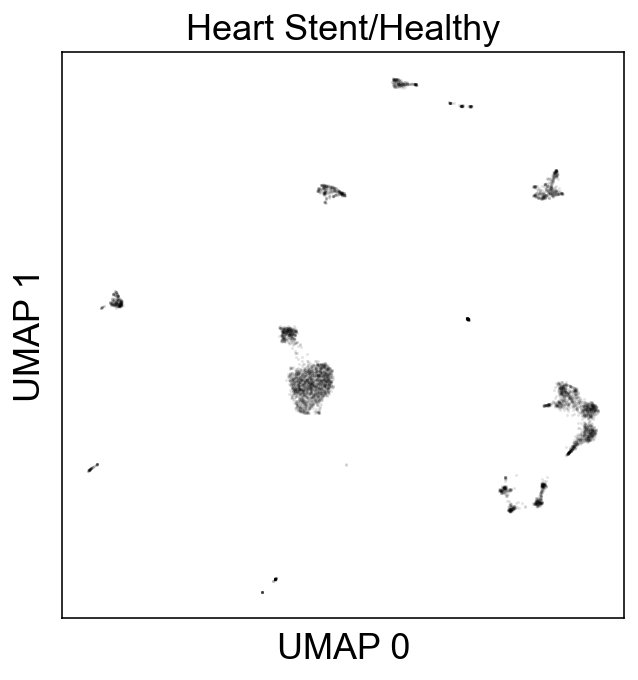

In [13]:
plot_umap(adata, "black", "Heart Stent/Healthy")

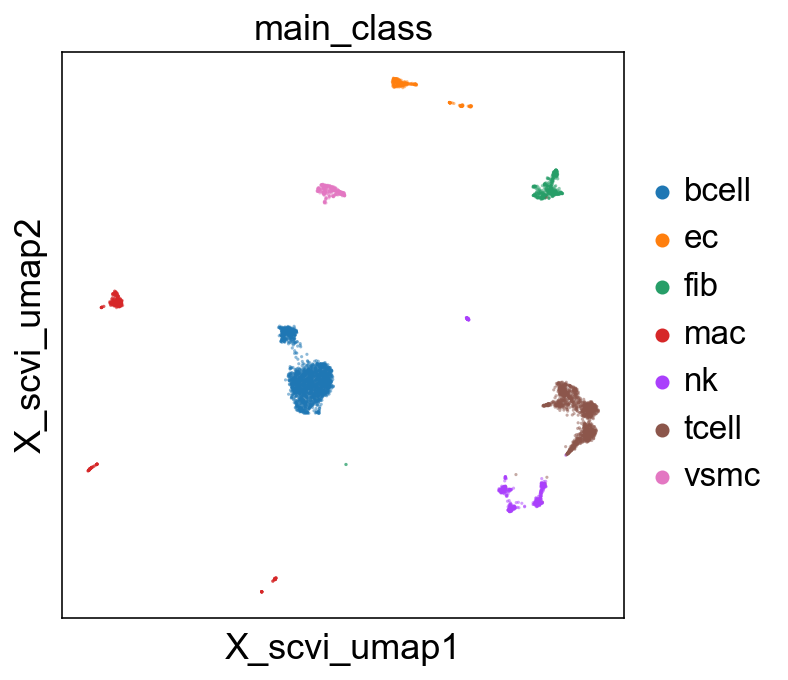

In [17]:
# plot main classes
plt.figure(figsize=(5, 5))
sc.pl.embedding(adata, basis='X_scvi_umap', color='main_class', ax=plt.gca(), size=10, alpha=0.5)

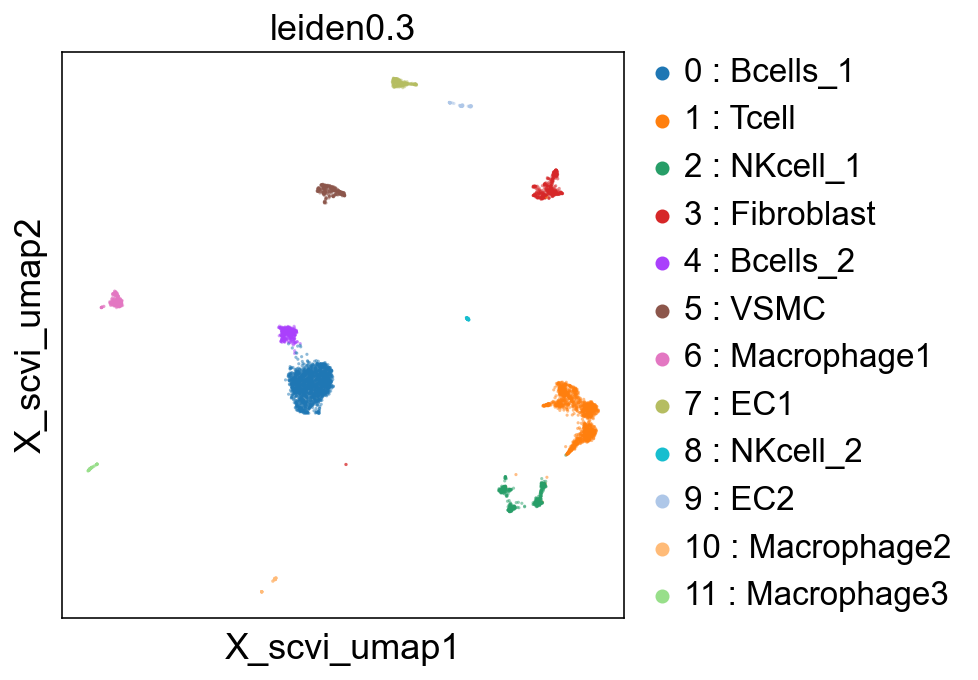

In [18]:
# plot all clusters
plt.figure(figsize=(5, 5))
sc.pl.embedding(adata, basis='X_scvi_umap', color='leiden0.3', ax=plt.gca(), size=10, alpha=0.5)

## Plot composition

In [20]:
mykey = "cc"

count_df      = pd.crosstab(adata.obs[mykey], adata.obs["leiden0.3"])
mycount_adata = anndata.AnnData(X=count_df)
mycount_adata.obs[mykey] = mycount_adata.obs.index

/Users/shayat/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


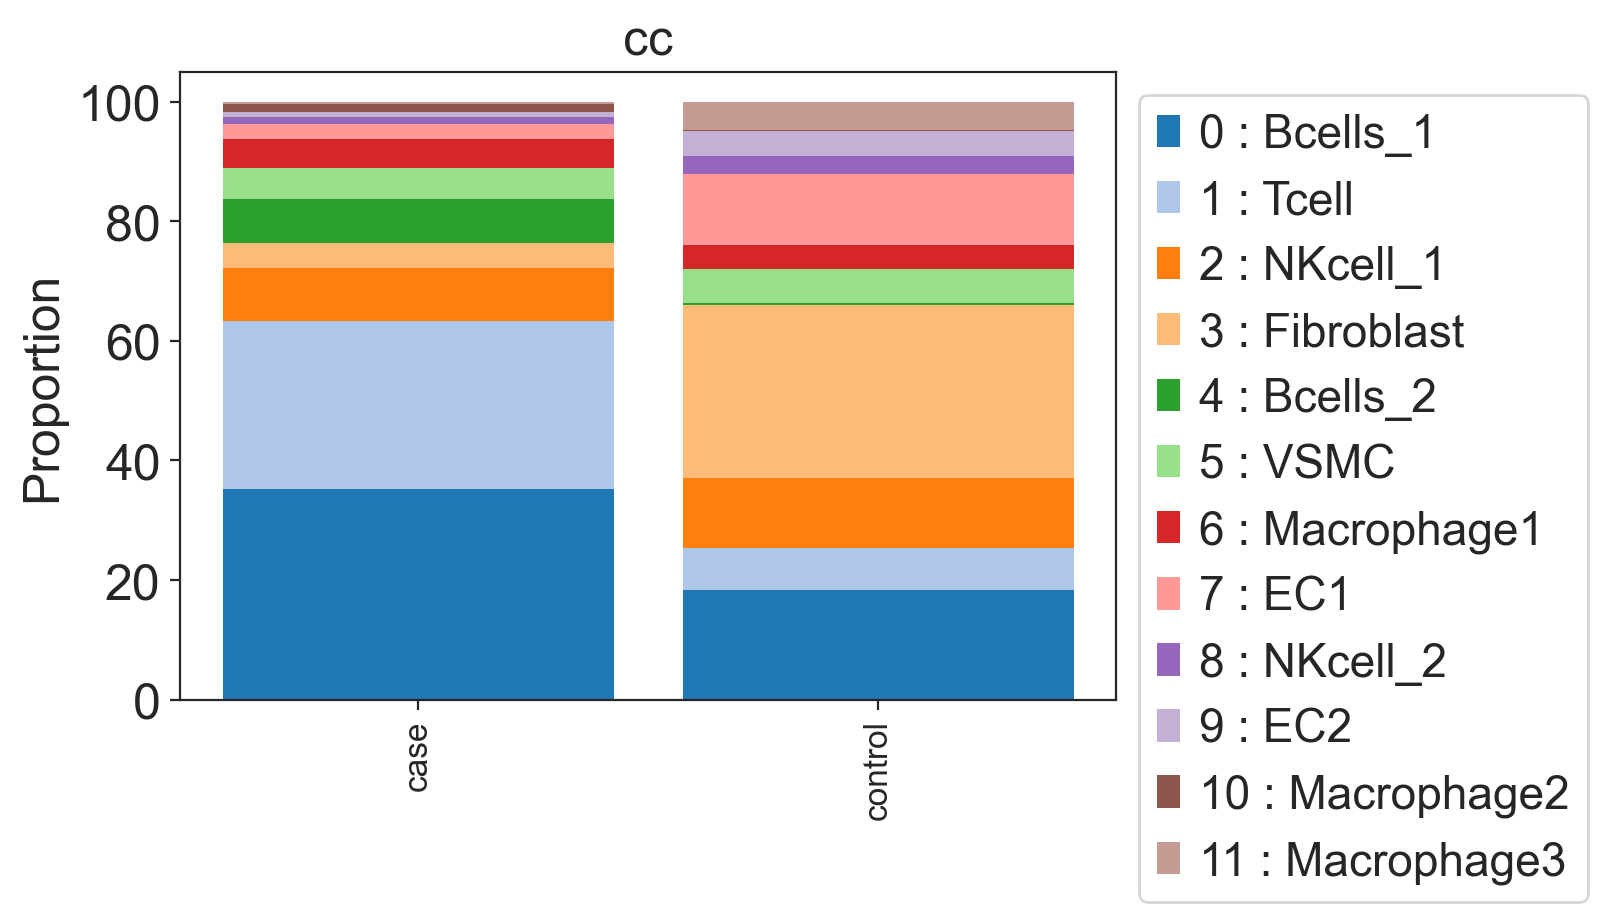

In [21]:
import warnings

from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

warnings.filterwarnings("ignore")

viz.stacked_barplot(mycount_adata, feature_name=mykey)
plt.xticks(fontsize=12, rotation=90)
#plt.show()
plt.savefig(resulthome+ 'cluster_composition.pdf', bbox_inches='tight')

## Plot QC

<Figure size 216x144 with 0 Axes>

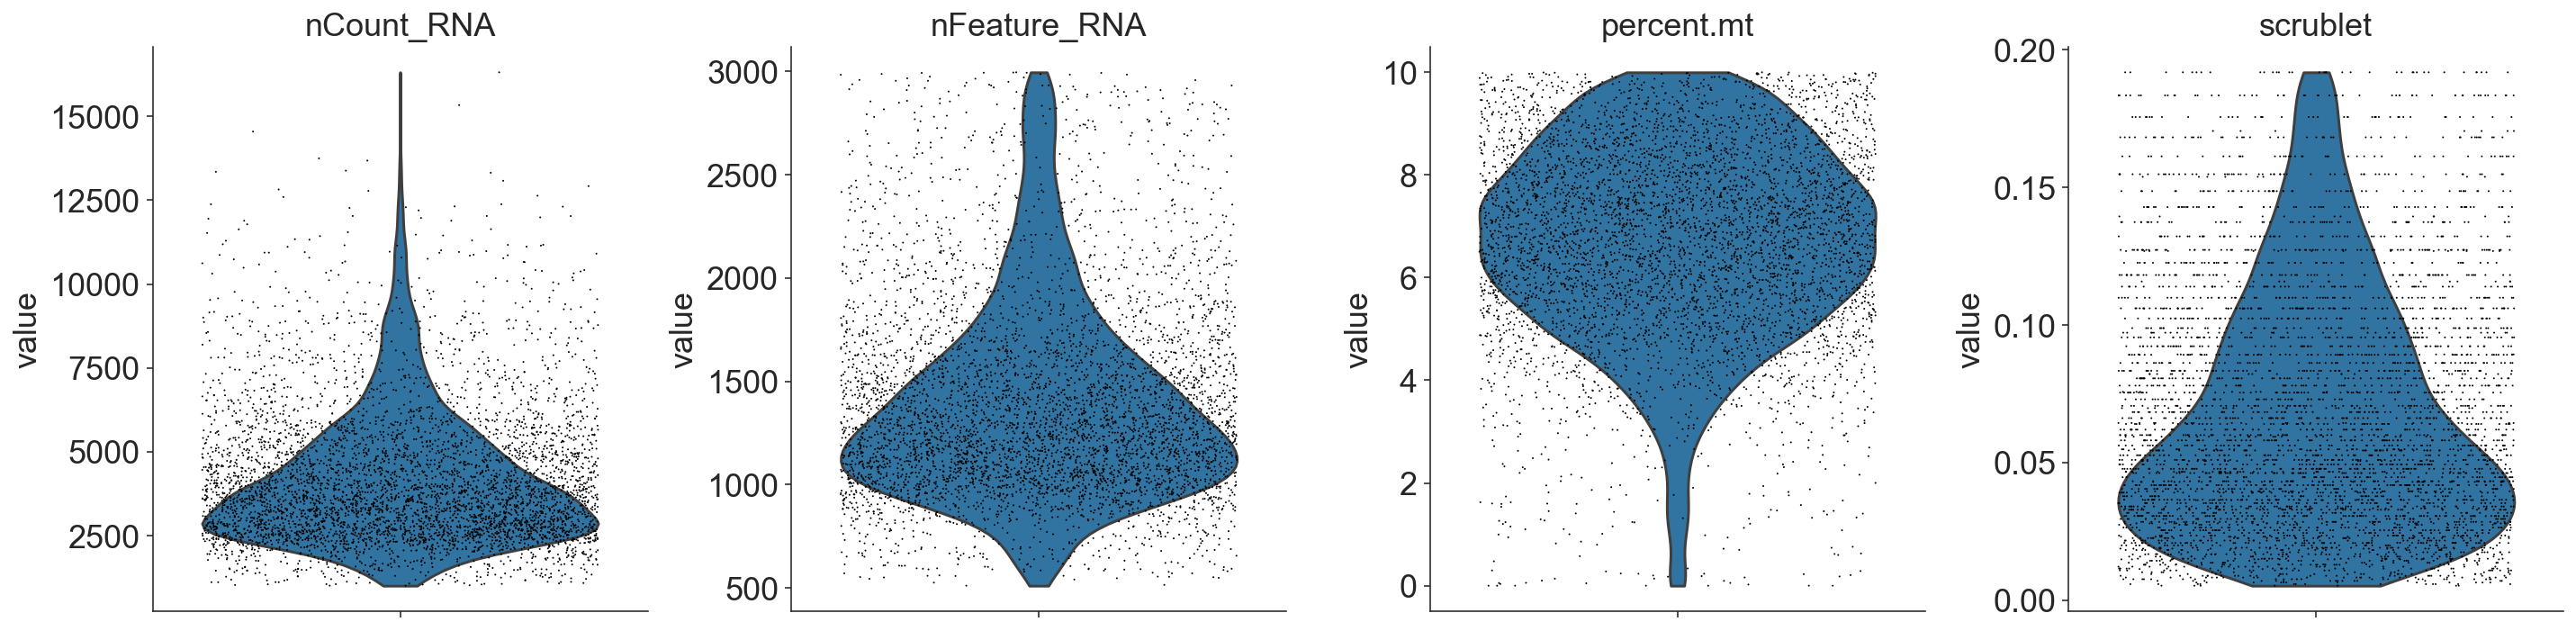

In [23]:
f = plt.figure(figsize = (3,2))

ax= sc.pl.violin(adata, ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'scrublet'],\
             jitter=0.4, multi_panel=True, ncols=3, show=False)
plt.tight_layout()
plt.savefig(resulthome+'Heart_stents_QC.pdf', bbox_inches='tight')

In [24]:
Counter(adata.obs["scvi_batch"])

Counter({0: 4409, 1: 708})

Text(0, 0.5, 'UMAP 2')

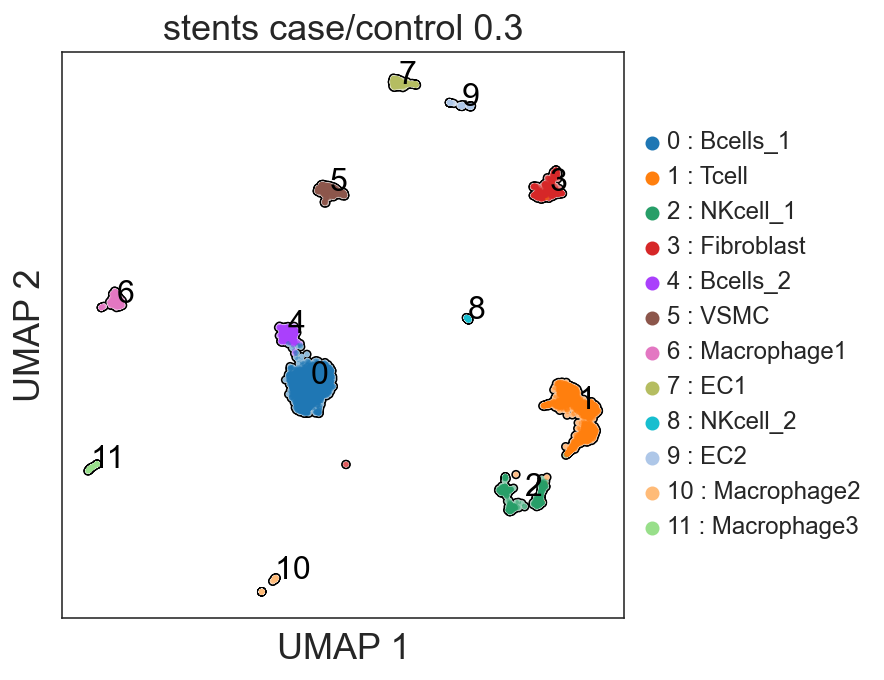

In [26]:
# show clustering with numbers
res = 0.3

plt.figure(figsize=(5, 5))
sc.pl.embedding(adata, add_outline=True, basis='scvi_umap', color='leiden'+str(res),\
                ax=plt.gca(), alpha=0.5, size=30, legend_fontsize=12,legend_fontoutline=10,\
                frameon=True, show=False)


df = pd.DataFrame(adata.obsm['X_scvi_umap'])
df['cluster'] = adata.obs['leiden' + str(res)].values
mean_pos = df.groupby('cluster').median()

for c in mean_pos.index:    
    plt.gca().text(mean_pos.loc[c][0], mean_pos.loc[c][1], c.split(':')[0], 
                   fontsize=16, color='black')

plt.title('stents case/control ' + str(res))
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

#plt.show()
####plt.savefig(resulthome+ 'Stents_Cell_type.pdf', bbox_inches='tight')

In [29]:
#res = 0.1
cluster_id = "leiden"+str(res)

In [31]:
plt.rcParams.update({'font.size': 18})

n = 5

marker_key = 'filter_rank_genes_groups_leiden' + str(res)
marker_key = 'rank_genes_groups' + str(res)

marker_genes = np.array(adata.uns[marker_key]['names'][:(n + 5)].tolist(), 
                        dtype=str).transpose()

In [58]:
unique_markers = []

#unique_markers.extend(genelist)
#unique_markers.extend(['Aqp1'])

for k in range(marker_genes.shape[0]):
    i = 0
    ## Add some common markers
    if k == 5:
        unique_markers.extend(['Tagln', 'Myh11'])
    if k == 3:
        unique_markers.extend(['Pdgfra'])
    if k == 9:
        unique_markers.extend(['Vwf'])
    if k == 9:
        unique_markers.extend(['Aqp1'])
        
    for g in marker_genes[k, :]:
        if i < n and g not in unique_markers and g != 'nan' and g != 'AC134224.3':  # malat1
            unique_markers.append(g)

            i += 1

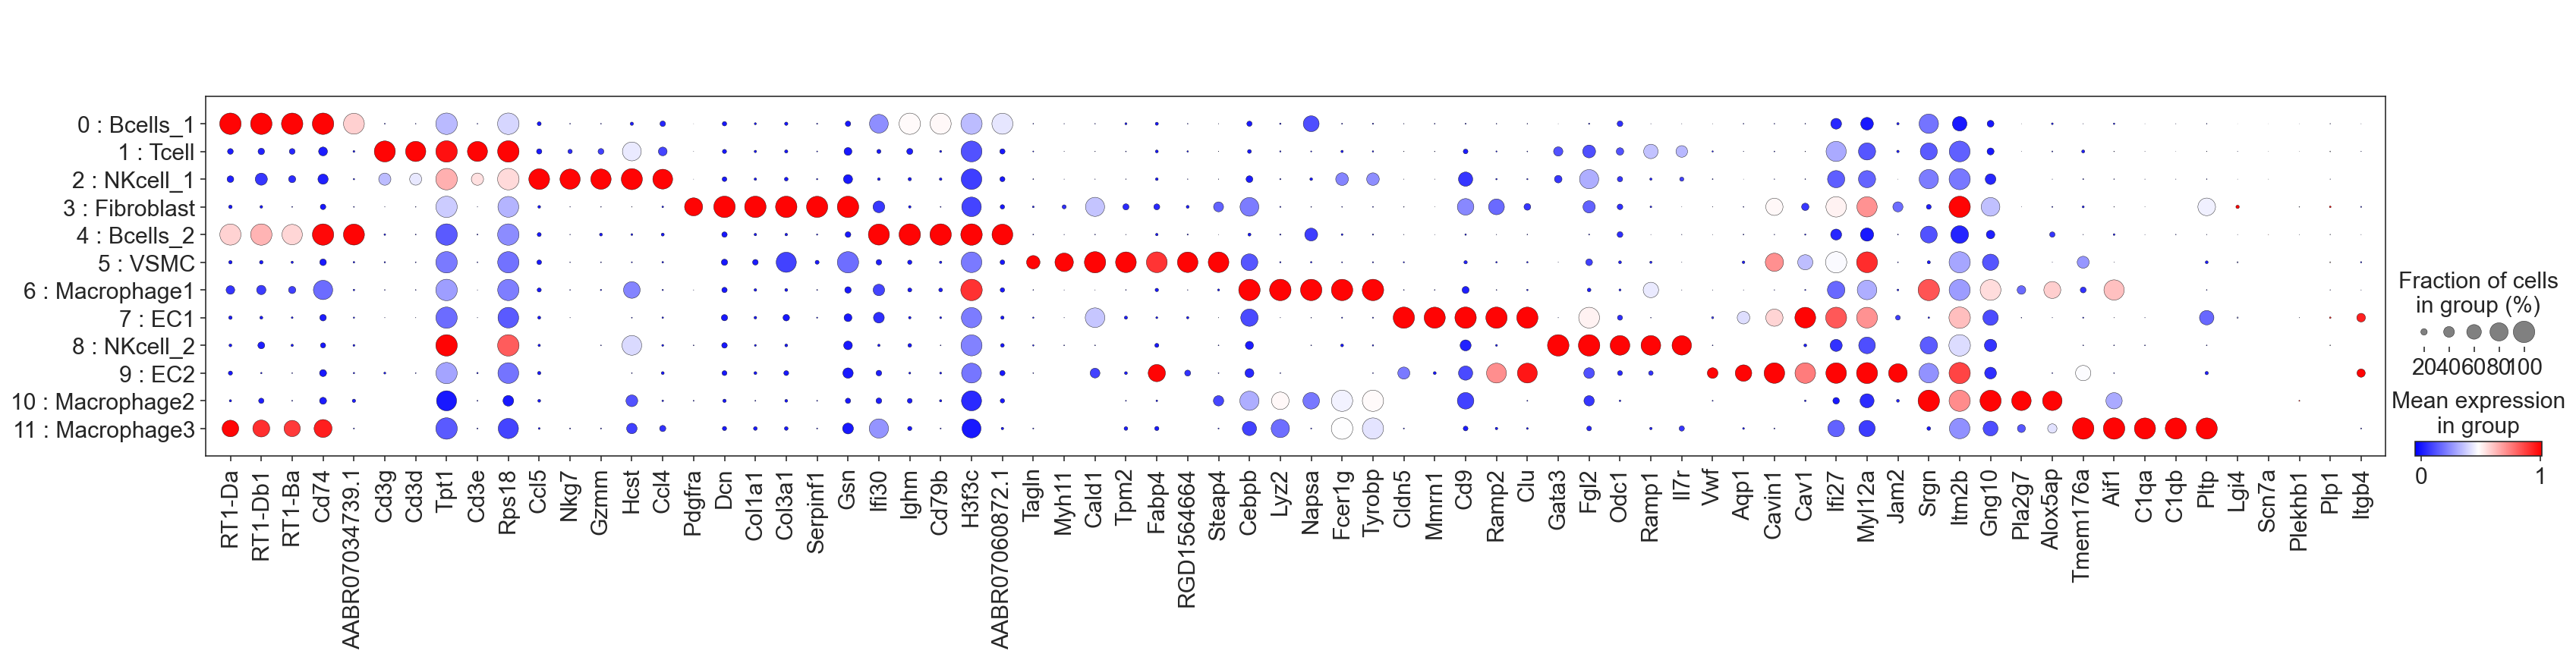

In [62]:
sc.pl.dotplot(adata,  var_names=unique_markers,groupby='leiden0.3', \
                                 use_raw=False,               vmin=-0.05,
              vmax=1.01,cmap='bwr', standard_scale='var', show=False)

plt.savefig(resulthome+ 'Stents_markers.pdf', bbox_inches='tight')

In [63]:
## QC Plots

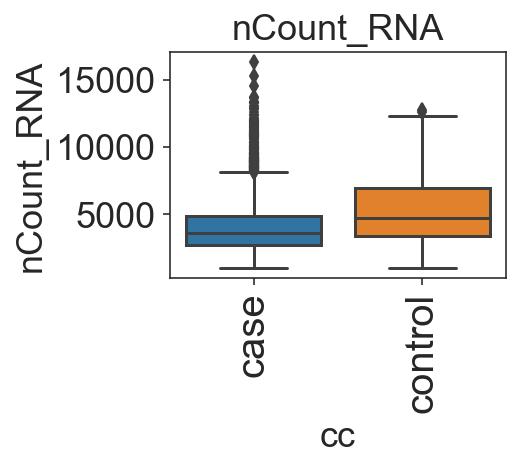

In [64]:
if 1:
    f = plt.figure(figsize = (3,2))
    ax = sns.boxplot(x="cc", y="nCount_RNA", data=adata.obs)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    #ax.set_ylim(0,.4)
    ax.set_title('nCount_RNA')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, size=20)
    plt.savefig(resulthome+ 'heart_stents_nCount_RNA.png', bbox_inches='tight')

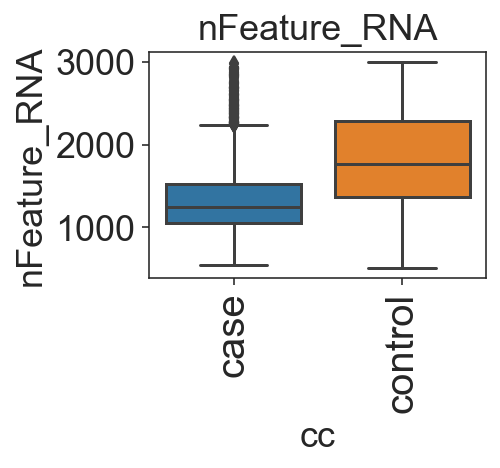

In [65]:
if 1:
    f = plt.figure(figsize = (3,2))
    ax = sns.boxplot(x="cc", y="nFeature_RNA", data=adata.obs)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    #ax.set_ylim(0,.4)
    ax.set_title('nFeature_RNA')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, size=20)
    plt.savefig(resulthome+ 'heart_stents_nFeature_RNA.png', bbox_inches='tight')

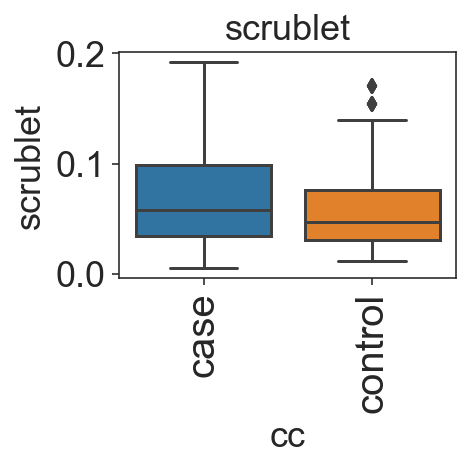

In [66]:
if 1:
    f = plt.figure(figsize = (3,2))
    ax = sns.boxplot(x="cc", y="scrublet", data=adata.obs)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    #ax.set_ylim(0,.4)
    ax.set_title('scrublet')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, size=20)
    plt.savefig(resulthome+ 'heart_stents_scrublet.png', bbox_inches='tight')

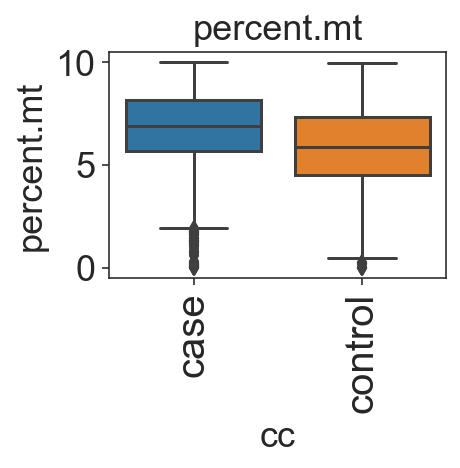

In [67]:
if 1:
    f = plt.figure(figsize = (3,2))
    ax = sns.boxplot(x="cc", y="percent.mt", data=adata.obs)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    #ax.set_ylim(0,.4)
    ax.set_title('percent.mt')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, size=20)
    plt.savefig(resulthome+ 'heart_stents_percent_mt.png', bbox_inches='tight')